<a href="https://colab.research.google.com/github/igedemadepradnyaairlangga/Dataanalitycs/blob/master/Tugas_Akhir_Dicoding_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike-Sharing-Dataset
- Nama: I Gede Made Pradnya Airlangga
- Email: pradnya.airlangga@gmail.com
- Id Dicoding: I Gede Made Pradnya Airlangga

## Menentukan Pertanyaan Bisnis

- Apa faktor-faktor yang paling berpengaruh terhadap tingkat penggunaan sepeda (bicycles) dalam sistem bike sharing kami?
- Bagaimana kondisi cuaca seperti suhu, hujan, dan kecepatan angin mempengaruhi jumlah peminjaman sepeda? Adakah perbedaan dalam pola peminjaman antara pengguna terdaftar dan pengguna kasual?

## Menghubungkan ke dataset yang ada di google drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [6]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [ ]:
!ls

 amazon_prime_titles.csv	 kaggle.json
 day.csv			 Mall_Customers.csv
'e-shop clothing 2008.csv'	'Salinan amazon_prime_titles.csv'
'e-shop clothing 2008.csv.zip'	 udemy_output_All_Finance__Accounting_p1_p626.csv
 hour.csv


## Menyaipkan semua library yang dibuthkan

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split

## Data Wrangling

### Gathering Data

memuat tabel day

In [ ]:
day_df = pd.read_csv(r'day.csv')

memunculkan tabel day

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


memuat tabel hour

In [ ]:
hour_df = pd.read_csv(r'hour.csv')

memunculkan tabel hour

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

menilai data day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


memastikan jumlah missing values yang terdapat di setiap kolom dalam tabl day

In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

memeriksa duplikasi data dalam tabel day

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


menilai data pada hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada hour_df

In [ ]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

tidak perlu melakukan cleaning data, dikarenakan data yang ada tidak terdapat missing value ataupun duplikat data

## Exploratory Data Analysis (EDA)

Eksplorasi tren harian dan musiman penggunaan sepeda

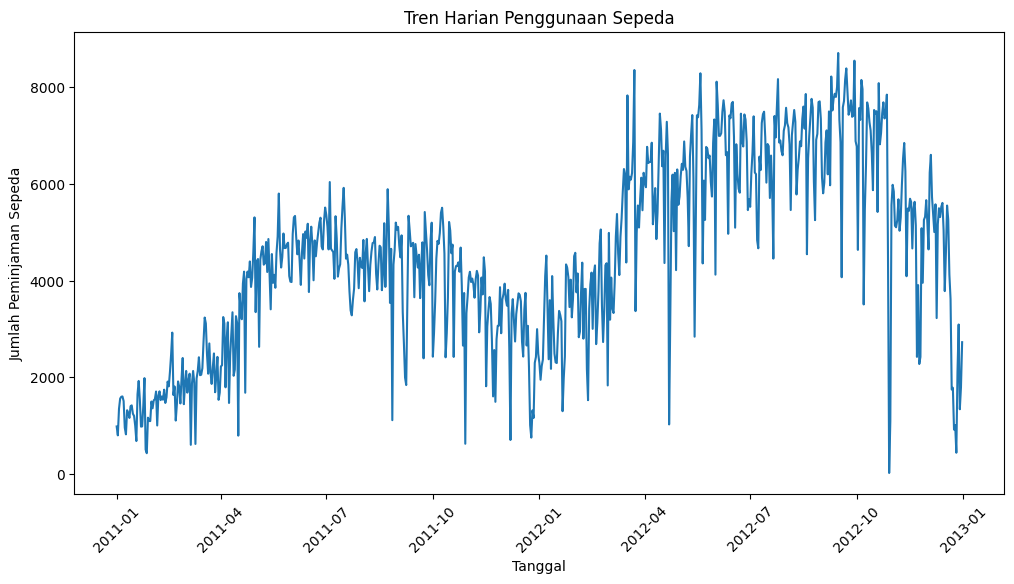

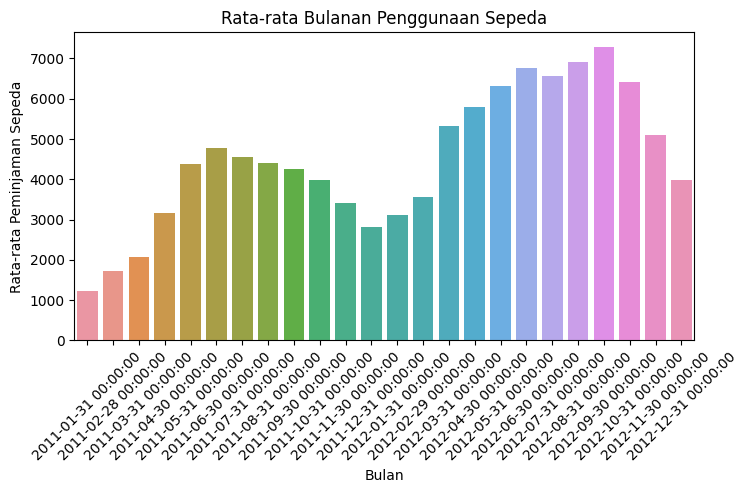

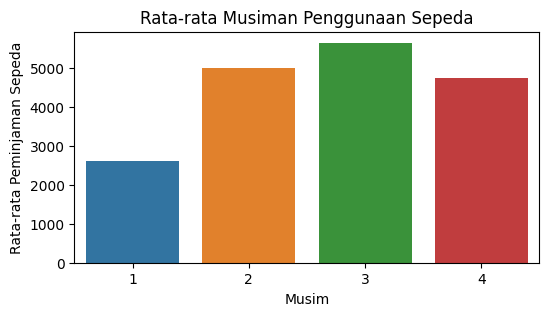

In [ ]:
# Mengonversi kolom 'dteday' ke dalam format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Membagi data berdasarkan tahun
day_df['year'] = day_df['dteday'].dt.year

# Menghitung jumlah peminjaman sepeda harian
daily_count = day_df.groupby('dteday')['cnt'].sum()

# Menghitung rata-rata jumlah peminjaman sepeda per bulan
monthly_average = day_df.resample('M', on='dteday')['cnt'].mean()

# Menghitung rata-rata jumlah peminjaman sepeda per musim
seasonal_average = day_df.groupby('season')['cnt'].mean()

# Menampilkan grafik tren harian penggunaan sepeda
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_count.index, y=daily_count.values)
plt.title("Tren Harian Penggunaan Sepeda")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(rotation=45)
plt.show()

# Menampilkan grafik rata-rata bulanan penggunaan sepeda
plt.figure(figsize=(8, 4))
sns.barplot(x=monthly_average.index, y=monthly_average.values)
plt.title("Rata-rata Bulanan Penggunaan Sepeda")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.xticks(rotation=45)
plt.show()

# Menampilkan grafik rata-rata musiman penggunaan sepeda
plt.figure(figsize=(6, 3))
sns.barplot(x=seasonal_average.index, y=seasonal_average.values)
plt.title("Rata-rata Musiman Penggunaan Sepeda")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.show()

Membandingkan tren peminjaman sepeda antara peminjam casual dan yang teregistrasi

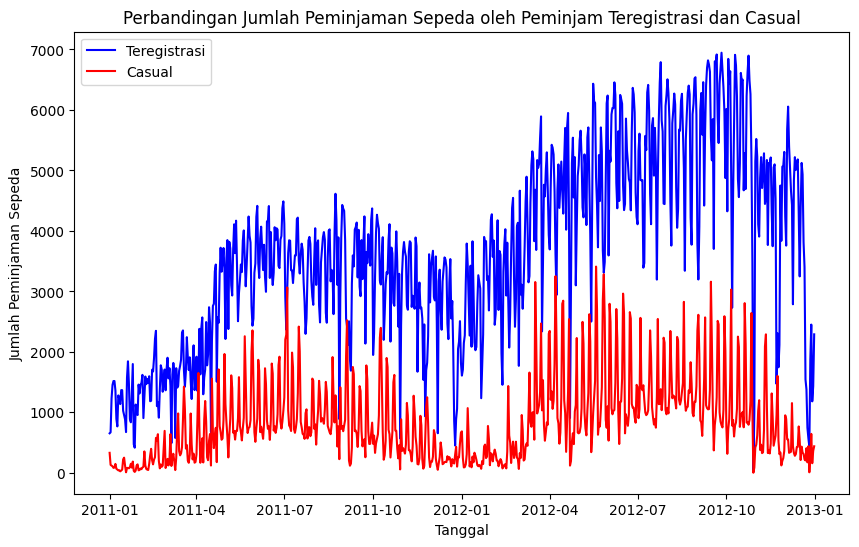

In [ ]:
# Mengonversi kolom 'dteday' ke dalam format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Menghitung jumlah peminjaman sepeda oleh peminjam teregistrasi
registered_counts = day_df['registered']

# Menghitung jumlah peminjaman sepeda oleh peminjam casual
casual_counts = day_df['casual']

# Membuat plot untuk perbandingan jumlah peminjaman sepeda oleh peminjam teregistrasi dan casual
plt.figure(figsize=(10, 6))
plt.plot(day_df['dteday'], registered_counts, label='Teregistrasi', color='blue')
plt.plot(day_df['dteday'], casual_counts, label='Casual', color='red')
plt.title("Perbandingan Jumlah Peminjaman Sepeda oleh Peminjam Teregistrasi dan Casual")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.legend()
plt.show()


pengaruh cuaca dalam penggunaan cuaca

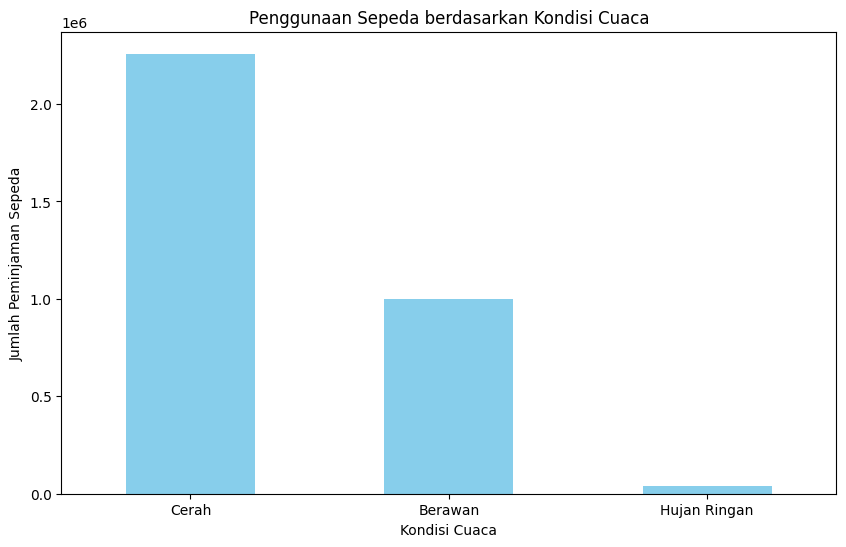

In [ ]:
# Menghitung jumlah peminjaman sepeda untuk kondisi cuaca yang berbeda
weather_counts = day_df.groupby('weathersit')['cnt'].sum()

# Mengonversi kode cuaca menjadi label yang lebih deskriptif
weather_labels = {
    1: "Cerah",
    2: "Berawan",
    3: "Hujan Ringan",
    4: "Hujan Berat"
}
weather_counts.index = weather_counts.index.map(weather_labels)

# Membuat bar plot untuk membandingkan penggunaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='skyblue')
plt.title("Penggunaan Sepeda berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(rotation=0)
plt.show()


mengeksplorasi hari dalam seminggu memengaruhi pola peminjaman. Apakah lebih banyak orang meminjam sepeda di akhir pekan?

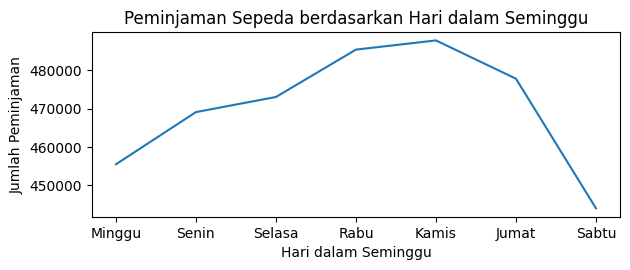

In [ ]:
# Mengubah kolom "dteday" menjadi tipe data datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Menambahkan kolom "day_of_week" yang berisi hari dalam seminggu (0: Minggu, 1: Senin, dst.)
hour_df['day_of_week'] = hour_df['dteday'].dt.dayofweek

# Menghitung jumlah peminjaman sepeda berdasarkan hari dalam seminggu
daily_rentals = hour_df.groupby('day_of_week')['cnt'].sum()

# Visualisasi peminjaman sepeda berdasarkan hari dalam seminggu
plt.subplot(2, 1, 1)
days = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
plt.plot(days, daily_rentals.values)
plt.title("Peminjaman Sepeda berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Peminjaman")

plt.tight_layout()
plt.show()


### Pertanyaan 1: Apa faktor-faktor yang paling berpengaruh terhadap tingkat penggunaan sepeda (bicycles) dalam sistem bike sharing kami?

**Pengujicobaan faktor 'temp', 'hum', 'windspeed', 'atemp' terhadap tingkat penggunaan sepeda (bicycles) dalam sistem bike sharing kami dalam dataset per day**

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Memuat dataset "day"
data_day = pd.read_csv('day.csv')

# Pilih fitur-fitur yang akan digunakan dalam analisis
# Di sini kita hanya memilih beberapa fitur contoh, Anda dapat menyesuaikannya
features = ['temp', 'hum', 'windspeed', 'atemp']

X = data_day[features]
y = data_day['cnt']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()

# Melatih model pada data latih
model.fit(X_train, y_train)

# Mengevaluasi model pada data uji
score = model.score(X_test, y_test)
print(f'Skor model: {score}')


Skor model: 0.499471718408134


### Pertanyaan 2:

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2